# CSCI E-25     

## Introduction to Deep Neural Networks

## Steve Elston

## 1.0 Overview

This lesson introduces you to the basics of neural network architecture in the form of deep forward networks. This architecture is the quintessential deep neural net architecture. In this lesson you will master the following:

- Why is deep learning important and how it relates to representation, learning and inference.
- How a basic Preceptron works.
- How to apply different types of loss functions.
- Understand why nonlinear activation is important and why rectified linear units are a good choice.
- How back propagation works, and how you apply the chain rule of calculus to determine gradient.
- Understand the architectural trade-off between depth and width in deep networks.
- Know how and why you must apply regularization to deep neural networks.  
- The importance of learning rate in training deep neural networks.

### 1.1 Why is deep learning important?

Deep learning methods are a form of **artificial intelligence (AI)** or **machine intelligence**. More specifically, deep learning algorithms are a type of **machine learning**.

What properties does machine intelligence require? There have been many answers to this question over the history of computing. In this case, we will take a practical view, sometimes known as **weak AI**. There are three key properties an intelligent machine must have. Deep learning algorithms are one of a few classes of algorithms that can do the following, essential to machine intelligence:

1. **Representation:** An intelligent machine must be able to represent a model of the world it interacts with in a general manner. Representation is key to intelligence. Without a good representation the best learning and inference algorithms will struggle. Whereas, good representation can greatly facilitate learning and inference. In conventional machine learning the representation is model and a set of features. The representation is limited to what the features can provide directly. Deep learning algorithms, on the other hand, learn learn complex representations from raw features. This behavior allows deep learning algorithms to approximate complex relationships. Further, the representations learned often generalize well, up to a point.
2. **Learning:** As you likely guessed from the very name, deep learning algorithms learn from data. Whereas, conventional machine learning is focused on inference,deep learning algorithms learn both inference and representations. As a result, deep leaning algorithms are more complex and therefore harder to train than conventional machine learning algorithms.  
3. **Inference:** Any machine intelligence algorithm must be able to perform inference. The inference is the result produced given new input data. To be useful, the inferences produced by a machine intelligence algorithm must **generalize** beyond the cases used for learning or training. Good generalization requires both good representations and learning which can deal with the complexity of diverse situations. Some deep learning algorithms can approach human levels of performance in inference tasks such as recognizing objects in images or understanding natural speech.

The figure below shows a highly abstracted view of machine intelligence, showing the relationship between representation, learning and inference. In simple terms, the representation is learned and then used to make inferences. Errors in the inferences can be used to improve the learning of the representation.   

<img src="https://github.com/whendo/CSCI-E25/blob/assignment5/Labs/img/MachineIntelligence.JPG?raw=1" alt="Drawing" style="width:600px; height:300px"/>

<center>Schematic for creating machine intelligence</center>

**That's it!** The entire rest of this course will focus on just these three points: representation, learning and inference!

### 1.2 Installing Keras

This notebook will provides a first look at using the Keras package to define, train and evaluate deep learning models with Keras. The Keras package is a wrapper on TensorFlow, intended to abstract and simplify the definition, training and execution of TensorFlow deep learning models. You can find extensive well-written documentation for Keras [here](https://keras.io/). The book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python-second-edition) by François Chollet, the creator of Keras, provides in-depth examples and discussion on a wide range of deep learning applications.      

By the end of this lesson you will be able to work with basic feedforward architecture multi-layer neural nets. Feedforward networks are one of a class of basic models called **sequential models** which are easy to define with Keras. Some basic regularization is introduced. Additional regularization methods are covered in a subsequent lesson.

Keras is part of the base package, as of the release of TensorFlow 2. Before proceeding make sure you have TensorFlow 2 installed in your environment. [Follow these instructions.](https://www.tensorflow.org/install).    

****
**Note:** As an alternative to working with a local installation, you may choose to use the [Google Colabratory](https://colab.research.google.com/?utm_source=scs-index). The Colabrotory virtual environment includes Anaconda, TensorFlow and Keras. However, the use of shared resources can result in slow execution.    
****

****
**Note:** This notebook was constructed and tested using Anaconda 3 with Python 3. It is assumed that the standard Anaconda stack has been installed.
****

In [1]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=c42396f7a0503759628255f2cd47b3ab82eaf01466f834b97a8e2379c52209f5
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [2]:
from keras.datasets import mnist
import tensorflow as tf
import np_utils as ku
## Depending on your environment and verison of Keras and Tensorflow you may need to
## substitue the following import for the foregoing'
## from keras import np_utils as ku
import keras.models as models
import keras.layers as layers
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras import regularizers
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.0 Forward propagation: The representation problem

To create useful neutral network we need a **representation** that has two important properties.   

First, there needs to be a way to represent complex functions of the input. Without this property, nothing is gained, since there are numerous machine learning algorithms that work with simple representations. We will spend the rest of this section exploring this problem.   

Second, the representation needs to be learnable. Quite obviously, no machine intelligence representation is useful if there is not a practical algorithm to learn it. We will take up this problem in another section.

### 2.1 Linear networks

Let's start with the simplest possible network. It has inputs, and an output. The output is a **afine transformation** of the input values. We say this network performs an afine transformation since there is a bias term $b$.


<img src="https://github.com/whendo/CSCI-E25/blob/assignment5/Labs/img/LinearNetwork.JPG?raw=1" alt="Drawing" style="width:400px; height:250px"/>

<center>**Figure 2.1**
**A simple afine network**</center>

This output $y$ of this network is just:

$$y = f(x) = \sum_i w_i \cdot x_i + b$$

This network performs linear regression. Being able to perform only afine transformations, it can't do anything else.

This representation is certainly learnable. However, it does not gain us anything over familiar linear regression methods.

### 2.2 The preceptron

To get started, let's have a look at a simple **preceptron** model. The perceptron was proposed by Rosenblatt (1962). He built on the earlier attempts at a neural network models by McCulloch and Pitts (1943) and Heeb (1949). The perceptron adds **nonlinear activation** to the afine network.


<img src="https://github.com/whendo/CSCI-E25/blob/assignment5/Labs/img/Preceptron.JPG?raw=1" alt="Drawing" style="width:350px; height:250px"/>
<center>Figure 2.2 Schematic of perceptron with nonlinear activation</center>

The output $y$ of the perceptron is given by the following:

$$y = f(x) = \sigma \Big( \sum_i w_i \cdot x_i + b \Big)$$

The output of the network is now nonlinear, give the **activation function** $\sigma(x)$.

But, the preceptron is nothing more than a logistic regression classifier. The fact that the preceptron could only solve linearly separable problems was pointed out by Minsky and Papert (1969). The failure of the preceptron to learn an **exclusive or (XOR)** function is well known. See for example, Section 6.1 in GBC.

Again, this representation is certainly learnable. However, as before, it does not gain us anything over well known logistic regression models.

### 2.3 Forward networks - We're gonna need a better representation!

The problem with the  perceptron is one of representations. There is no way that this simple network can represent anything but a linearly separable function. To represent more complex functions, we need a more complex network. In more technical terms we need a network with greater **model capacity**.

What we need is a network with layers of **hidden nodes**. The figure below shows a simple example of a neural network with one **hidden layer** with two nodes. Since every node (including inputs) is connected to every other node we call this architecture a **fully connected neural network**.


<img src="https://github.com/whendo/CSCI-E25/blob/assignment5/Labs/img/Hidden.JPG?raw=1" alt="Drawing" style="width:600px; height:350px"/>
<center>**Figure 2.3  
Fully connected neural network with single hidden layer**</center>

Let's walk through some aspects of these diagrams.

1. The neural network is divided into three layers. The input layer, the hidden layer and the output layer.
2. The values in the input layer are multiplied by a weight matrix, $W^1$.
3. The nodes in the hidden layer sum their inputs and add a bias term, $b^1$.
4. The outputs of the hidden layer nodes are multiplied by a weight vector, $W^2$.
5. The output layer sums the inputs and adds another bias term, $b^2$.

### 2.4 Neural network architectures - Finding representations

The representations achievable by neural network with just a single hidden layer  are quite powerful. In fact, Cybenko (1989) showed that such a network with an infinite number of hidden units using sigmoidal activation can approximate any arbitrary function. Hornik (1991) generalized this to apply to any activation function. We call this theorem the **universal approximation theorem**.  

A universal approximation theorem may see like a really exciting development; especially if you are a machine intelligence nerd. However, one must be circumspect when viewing such a result. A representation with an infinite number of nodes cannot be learned in any practical sense. Still it is comforting to know that, at least in principle, a representation can be learned for arbitrarily complex problems.

While infinitely wide networks with a single layer are unrealistic, we are not limited to one dimension. In fact, depth is typically more effective at creating complex representations rather than width in neural networks. Depth is measured by the count of hidden layers stacked one on top of the other in the network. Hence, the term deep neural networks.

The Figure 2.4 below shows the results of an empirical study by Goodfellow, Shlens and Szegedy (2014) of accuracy of the network vs depth. Notice that accuracy increases rapidly with depth until about 8 layers, after which the effect is reduced.


<img src="https://github.com/whendo/CSCI-E25/blob/assignment5/Labs/img/Accuracy-Layers.JPG?raw=1" alt="Drawing" style="width:600px; height:350px"/>
<center>Figure 2.4 Empirical results of accuracy vs. number of layers  
Diagram from Goodfellow et. al. 2014</center>

Another view of the empirical study by Goodfellow et. al. is shown in Figure 2.5 below. In this case accuracy verses number of model parameters is compared for three different network architectures. The deeper network (11 layers) makes more  efficient use of the parameters in terms of improved accuracy. The number of parameters in a layer is approximately the total number of parameters divided by the number of layers. Notice that for the particular case tested convolutional neural networks are more efficient than fully-connected networks. We will discuss convolutional neural networks in a subsequent lesson.

Of particular interest is the fact that the fully-connected network and the shallow convolutional neural network appear to be over-fitting as the test accuracy actually decreases as the number of parameters increases. We will discuss the significant problems of over-fitting in neural networks in a subsequent lesson.


<img src="https://github.com/whendo/CSCI-E25/blob/assignment5/Labs/img/Accuracy-Parameters.JPG?raw=1" alt="Drawing" style="width:600px; height:350px"/>
<center>**Figure 2.5 Empirical results of accuracy for different network architectures**  
Diagram from Goodfellow et. al. 2014</center>

**Summary:** Deep networks tend to produce better models, with less tendency to over-fit, for a given level of complexity.

### 2.5 Computational graphs

There is another way to look at neural nets, computational graphs. A computational graph breaks down the steps of a complex algorithm into steps.

Computational graphs provide a way to organize complex computations in an efficient manner. Widely used computational frameworks such as Tensor Flow, CNTK, and Torch all use computational graphs. Organizing computations in a graph allows these platform to minimize memory transfers. In simple terms, the platform can look ahead in the graph and organize data and computational results so as to minimize memory transfers. As a result, such platforms can be significantly faster than, say, Python Numpy. Systems like Numpy require memory transfer before each operation, which typically take more time than the actual computation.

The diagram below decomposes the single hidden layer neural network discussed in the previous section into a computational graph.


<img src="https://github.com/whendo/CSCI-E25/blob/assignment5/Labs/img/CompGraph1.JPG?raw=1" alt="Drawing" style="width:600px; height:300px"/>
<center>**Figure 2.6  
Computational graph for fully connected neural network of Figure 2.3** </center>

Let's walk though this graph, step by step.

1. The $nX2$ weight tensor, $W^1$, is multiplied by the 1-dimensional input tensor $x \in\ R^n$, giving  the result $U^1 \in\ R^2$.
2. The 1-dimensional bias tensor $b^1 \in\ R^2$ is added to $U^1$, giving $U^2 \in\ R^2$.
2. The activation function $\sigma_h(x)$ is applied to $U^2$, producing $U^3 \in\ R^2$
3. The dot product between the weight tensor, $W^2 \in\ R^2$ and $U^3$ is computed giving $U^4 \in\ R^1$.
4. The bias, $b^2 \in\ R^1$ is added to $U^4$ giving $U^5 \in\ R^1$.
5. The output activation function $\sigma_o(x)$ is applied to $U^4$ giving the output $Y \in\ R^1$.

As you can see, the computational graph provides a complete specification for the single hidden layer neural network.

### 2.6 Activation functions

Without a nonlinear activation function, a neural net is just an afine transformation. Afine transformations limit representation to only linearly separable functions. To create more general representations **nonlinear activation functions** are required.

In present practice, four types of activation functions are generally used for fully connected networks.

1. **Linear** activation is used for the output layer of regression neural networks.
2. The **rectilinear** activation function is used for most hidden units. The rectilinear activation function is often referred to as **ReLU**.
3. A **leaky rectilinear** activation acts like a ReLU function for positive inputs, but has a small negative bias or leakage for negative input values. The leaky ReLU activation function can improve training for some deep neural networks.
3. The **logistic** or **sigmoid** activation function is used for binary classifiers.
4. The **softmax** activation function is used for multi-class classifiers.

Rectilinear functions are typically used as the activation function for hidden units in neural networks. The rectilinear function is defined at:

$$f(x) = max(0, x)$$

The rectilinear function is linear for positive responses and zero for responses less than 0.0. Notice that the derivatives of the rectilinear function are not continuous. While this might seem to be a problem, in practice, even gradient-based optimization functions work well with this activation function.

The rectilinear function is plotted in the cell below:

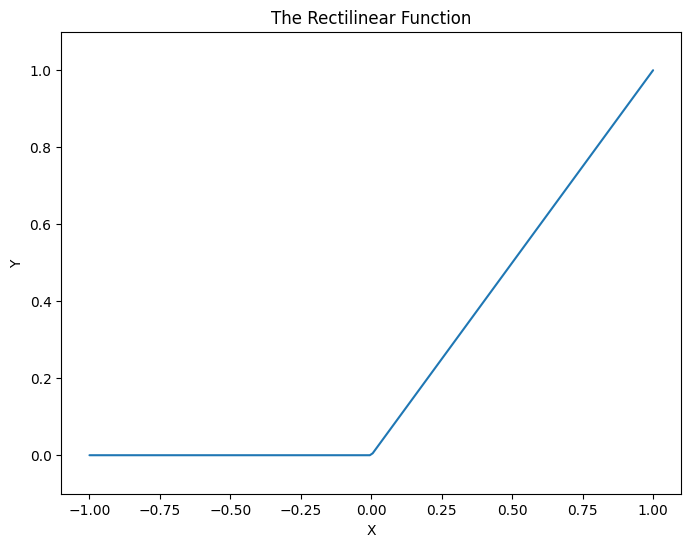

In [3]:
def reclu(x): return(max(0,x))

def plot_figs(x,y,title, figsize = (8, 6)):
    plt.figure(figsize=figsize).gca() # define axis
    sns.set_style("darkgrid")
    plt.plot(x, y)
    plt.ylim((-0.1,1.1))
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

x = np.linspace(-1.0, 1.0, 200)
y = [reclu(y) for y in x]
plot_figs(x,y,'The Rectilinear Function')

Another widely used activation function is the **logistic** or **sigmoid**. The sigmoid is used as the activation for the output layer of a binary classifier. The general sigmoid function can be written as:

$$\sigma(x) = \frac{L}{1 + e^{-k(x_0-x)}}\\
where\\
L = max\ value\\
k = slope\\
x_0 = sigmoid\ midpoint$$

With $L=1$, $k=1$, and $x_0 = 0$, the logistic function becomes:

$$\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$$

The sigmoid function can asymptotically approach $0$ or $1$, but will never reach these extreme values. However, because of the rapid decrease in the derivative away from $0$ the sigmoid can **saturate** when using gradient-based training. For this reason, the sigmoid is typically not used for hidden layers in neural networks.   

When used in a the binary classifier a threshold is set to determine if the result is $0$ or $1$. The threshold can be adjusted to bias the result as desired.

The code in the cell below plots the sigmoid function.

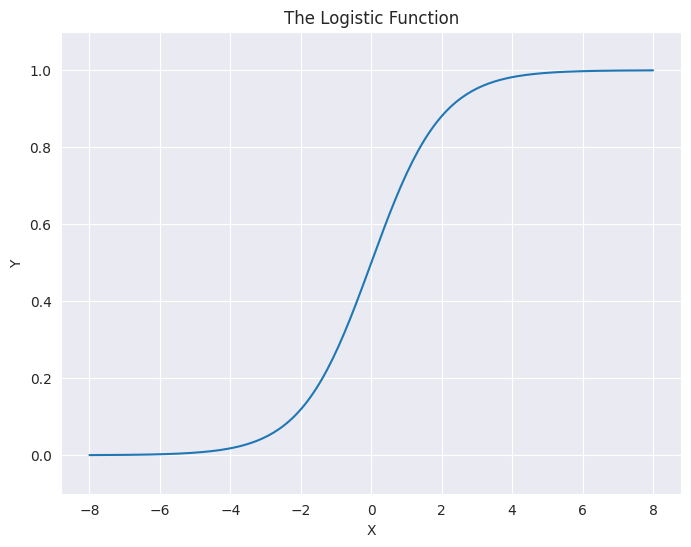

In [4]:
def sigmoid(x): return exp(x)/(1 + exp(x))

x = np.linspace(-8.0, 8.0, 200)
y = [sigmoid(y) for y in x]
plot_figs(x,y,'The Logistic Function') #, figsize = (5,3))

The **softmax** function or **normalized exponential function** is used for the output activation function of a multi-class classifiers. The softmax function is the multinomial generalization of the sigmoid or logistic function. The probability of each class $j$ is written as:

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

The normalization $\sum_{k=1}^K e^{z_k}$ ensures the sum of probabilities for all classes add to $1.0$. The class selected by the classifier is the class with the largest value of $\sigma(z_j)$.

### 2.7 Computational example

Now that we have gone though some basic theory for feed-forward networks, it's time try a simple example. You will construct a fully connected network to compute this simple function:

$$y = x_1 - x_2$$

****
**Comment.** You have likely have noticed that this function is linear and can be computed easily without a neural network. Of course, that is not the point. We use a simple function to make the results easy to understand.
****



> **Exercise 5-1:** You will create and test a simple neural network implemented using matrix multiplication with Numpy. The architecture of the neural network is similar to the one shown in Figure 2.3, with 2 input units, 2 hidden units and 1 output unit. There are a total of 6 weights in two tensors. The neural network for this example does not require any bias terms.
> 1. As a first step, create test data for 3 possibilities; $x_1 > x_2$, $x_1 = x_2$, and $x_1 <x_2$, and with positive and negative values, or $x = [(2,1), (1,1), (1,2), (0,0), (2,-1), (-1,-1), (-2,1), (-1,-2)]$ as the input tuples.
> 2. Directly compute and print the evaluation of the function, $y = x_1 - x_2$, for each tuple.  

> **Note:** The network you are asked to construct is simple and all weights must in the set $\{-1, 1 \}$. You can take advantage of the symmetry of the function you must approximate to determine these weights by inspection. If you wish, you will find it easy to compute the partial derivatives of the function to be approximated. However, this is not necessary if you carefully inspect the network and consider the responses required.


In [5]:
## Your code goes here
x = [(2,1), (1,1), (1,2), (0,0), (2,-1), (-1,-1), (-2,1), (-1,-2)]
for x_in in x:
    print(x_in[0] - x_in[1])

1
0
-1
0
3
0
-3
1


> 3. Now that you have the test data you can move to the next step. Determine the values of the $2 \times 2$ weight tensor between the input layer and the hidden layer (input tensor) and the $2 \times 1$ weight tensor between the hidden and output layer (output tensor). In the code cells below create as Numpy arrays and print these tensors. *Hint:* Keep in mind that the input tensor must be symmetric, with correct signs on the $\{-1,1\}$ weights. Likewise, the output tensor $\{-1,1\}$ weights must have the opposite signs.  

In [6]:
## Your code goes here
W_1 = np.array([[1.0, -1.0], [-1.0, 1.0]])
print(W_1)

[[ 1. -1.]
 [-1.  1.]]


In [7]:
## Your code goes here
W_2 = np.array([1, -1])
print(W_2)

[ 1 -1]


> 4. Now, it is time to compute the results and check them. To create the computational process follow the graph in Figure 2.6, but ignoring the bias terms, $b^1$ and $b^2$.
> Create a function, `hidden`, to compute the output of the hidden layer using the formulation with **rectalinear activation**, $\delta()$:   
> $$h = \delta(W^1 \cdot x)$$
> Create a second function ,`output`, to computes the vector product of the weight vector with the output vector of the hidden layer using a **linear activation**:    
> $$o = W^2 \cdot h$$
> 5. Execute the two functions while iterating over the input tuples and verify the output is correct. If not, reconsider the values of your weight tensors.   

In [8]:
## Your code goes here
def hidden(x, W):
    """Computes the output of the hidden layer"""
    h = np.dot(W, x) # product of weights and input vector
    return np.array([reclu(x) for x in h]) # apply activation function and return

def output(h, W):
    """Computes the result for the hidden layer"""
    return np.dot(W, h) # dot product of weight vector and input vector

## Run the test cases and check the results
for y in x:
        h = hidden(y, W_1)
        print(output(h, W_2))

1.0
0
-1.0
0
3.0
0
-3.0
1.0


> If your results agree with the function created above, congratulations! Your first fully connected neural network passed all the tests!  
> **End of exercise**.

Notice that even a network to compute a simple function requires 6 weights. You can see that for more complex functions any practical algorithm must learn a large number of weights. The limitations of Numpy would quickly become evident for large scale problems involving hundreds of millions of weights.

****
**Note:** If you are having difficulty following the Numpy code in the above example, you might want to look at [Scott Shell's Numpy Tutorial](https://engineering.ucsb.edu/~shell/che210d/numpy.pdf)
****

> **Exercise 5-2:** You will now construct and test an neural network implementing an [exclusive or function, the XOR](https://en.wikipedia.org/wiki/Exclusive_or). The XOR function outputs a 1 if either input is 1 and the other 0, and a 0 otherwise. The truth table for the XOR function is:   

$$\begin{bmatrix}
in_1 & in_2 &  out\\         
0 & 0 & 0\\   
1 & 0 & 1\\    
0 & 1 & 1\\    
1 & 1 & 0
\end{bmatrix}$$     


> You can use the `hidden` and `output` functions you created for the previous exercise with new weight tensors. Make sure you try all 4 possible test cases.  

In [9]:
x = [(0,0), (1,0), (0,1), (1,1)]

W_1 = np.array([[1.0, -1.0], [-1.0, 1.0]])

W_2 = np.array([1, 1])

## Run the test cases and check the results
for y in x:
        h = hidden(y, W_1)
        print(output(h, W_2))

0
1.0
1.0
0


> If your output agrees with the truth table, congratulations! You have solved the XOR problem using nonlinear activation.       
> **End of exercise.**

## 3.0 Learning in neural networks: Backpropagation

Now that we have a promising representation, we need to determine if it is trainable. The answer is not only yes we can, but that we can do so in a computationally efficient manner, using a cleaver algorithm known as **backpropagation**.

The backpropagation algorithm was developed independently multiple times. The earliest work on this algorithm was by Kelly (1960) in the context of control theory and Bryson (1961) in the context of dynamic programming. Rumelhart, Hinton and Williams (1984) demonstrated empirically that backpropagation can be used to train neural networks. Their paper marks the beginning of the modern history of neural networks, and set off the first wave of enthusiasm.

The backpropagation algorithm requires several components. First, we need a **loss function** to measure how well our representation matches the function we are trying to learn. Second, we need a way to propagate changes in the representation through the complex network For this we will use the **chain rule of calculus** to compute **gradients** of the representation. In the general case, this process requires using automatic differentiation methods.

The point of backpropagration is to learn the optimal weight for the neural network. The algorithm proceeds iteratively through a series of small steps. Once we have the gradient of the loss function we can update the tensor of weights.

$$W_{t+1} = W_t + \alpha \nabla_{W} J(W_t) $$  
where  
$W_t = $ the tensor of weights or model parameters at step $t$.   
$\alpha\ = $ step size or learning rate.  
$J(W) = $ loss function given the weights.  
$\nabla_{W} J(W) = $ gradient of $J$ with respect to the weights $W$.  

It should be evident that the back propagation algorithm is a form of gradient decent. The weights are updated in small steps following the gradient of $J(W)$ down hill.

Finally, we need a way evaluate the performance of the model. Without evaluation metrics we have no way to compare the performance of a given model, or compare the performance of several models.

In the next sections, we will address each of loss functions, gradient computation and performance measurement.

### 3.1 Loss functions

To train a neural network we must have a **loss function**, also known as a **cost function**. In simple terms, the loss function measures the fit of a model to the training data. The lower the loss, the better the fit.

To train deep learning models **cross entropy** is often used as a loss function. This is an information theoretic measure of model fit. We can understand cross entropy as follows.

First define **Shannon entropy** as:

$$\mathbb{H}(I) = E[I(X)] = E[-ln_b(P(X))] = - \sum_{i=1}^n P(x_i) ln_b(P(x_i)$$  
Where:  
$E[X] = $ the expectation of $X$.  
$I(X) = $ the information content of $X$.   
$P(X) = $ probability of $X$.  
$b = $ base of the logarithm.    

This rather abstract formula gives us a way to compute the expected information content of a set of values $X$. The more likely (higher probability) of $X$ the less informative it is.

To create a loss function from the definition of Shannon entropy we start with the **Kullback-Leibler divergence (KL divergence)** or **relative entropy**. The KL divergence is an information theoretic measure of the difference between two distributions, $P(X)$ and $Q(X)$.

$$\mathbb{D}_{KL}(P \parallel Q) = - \sum_{i=1}^n p(x_i)\ ln_b \frac{p(x_i)}{q(x_i)}$$

Ideally, in the case of training a machine learning model we want a distribution $Q(X)$, which is identical to the actual data distribution $P(X)$.

But, you may say, if we could know $P(X)$ why compute $Q(X)$ at all? Fortunately, we do not have to. We can rewrite the KL divergence as:

$$\mathbb{D}_{KL}(P \parallel Q) = \sum_{i=1}^n p(x_i)\ ln_b p(x_i) - \sum_{i=1}^n p(x_i)\ ln_b q(x_i)$$

Since $P(X)$ is fixed and we wish to find $Q(X)$ when we train our model, we can minimize the term on the right, which is the **cross entropy** defined as:

$$\mathbb{H}(P,Q) = - \sum_{i=1}^n p(x_i)\ ln_b q(x_i)$$

From the formulation of KL divergence above you can see the following.

$$\mathbb{D}_{KL}(P \parallel Q) = \mathbb{H}(P) + \mathbb{H}(P,Q)\\
\mathbb{D}_{KL}(P \parallel Q) = Entropy(P) + Cross\ Entropy(P,Q)$$

Thus, we can minimize divergence by minimizing cross entropy. This idea is both intuitive and computationally attractive. The closer the estimated distribution $q(X)$ is to the distribution of the true underling process $p(X)$, the lower the cross entropy and the lower the KL divergence.

In general we will not know $p(X)$. In fact, if we did, why would we need to solve a training problem? So, we can use the following approximation.

$$\mathbb{H}(P,Q) = - \frac{1}{N} \sum_{i=1}^n ln_b q(x_i)$$

You may notice, that this approximation, using the average log likelihood, is equivalent to a maximum likelihood estimator (MLE).

Let's look at a specific case of a model with Gaussian likelihood. What is the cross entropy? We can start by thinking about the definition of likelihood.

$$p(data|model) = p(data|f(\theta)) = p(x_i|f(\hat{\mu},\sigma))= \frac{1}{2 \pi \sigma^2} e^{\frac{-(x_i - \hat{\mu})^2}{2 \sigma^2}}$$

We take the negative logarithm of this likelihood model.

$$-log\big(p(data|model) \big) = - \frac{1}{2}\big( log( 2 \pi \sigma^2) + \frac{(x_i - \hat{\mu})^2}{2 \sigma^2} \big)$$

Now, the first term on the right is a constant, as is the denominator of the second term if we assume known variance. Since our goal is to minimize cross entropy, we can eliminate these quantities and be left with just the following.

$$-(x_i - \hat{\mu})^2$$

This is one issue we need to deal with. Our formulation of cross entropy involves the unknown true distribution of the underling process $p(X)$. However, since $p(x_i)$ is fixed but unknown we can just write the following.

$$min \big( \mathbb{H}(P,Q) \big) \propto argmin_{\mu} \big( - \sum_{i=1}^n (x_i - \hat{\mu})^2 \big)$$

This is just the definition of a Maximum Likelihood Estimator (MLE) for the least squares problem! In fact, since the cross entropy is computed using the negative log likelihood, it will always be minimized by the MLE.

You can see another example of [cross-entropy error function and logistic regression](https://en.wikipedia.org/wiki/Cross_entropy).

### 3.2 Computing Loss functions

The loss function is used to train the model. Therefore the loss function must be computed in an efficient manner.

Given the number of parameters in deep neural nets over-fitting is inevitable. Therefore some regularization is required. We will discuss regularization in greater depth in another lesson. For now, we will just use the following regularized form.

$$\mathbb{H}(P,Q) = J(\theta) = - \frac{1}{N}\sum_{i=1}^n ln_b q(x_i|\theta) + \lambda ||\theta||^2\\
where\\
- \frac{1}{N}\sum_{i=1}^n ln_b q(x_i|\theta) = J_{MLE}(\theta)\\
||\theta||^2 = L^2\ norm\ regularization\ term$$

To minimize $J(\theta)$ in this form $\theta$ must be chosen to keep $||\theta||^2$ small while minimizing the negative log likelihood of $q(x_i|\theta)$.

Let's  consider how we would compute this form of the lost function. The computational graph shown below illustrates the computational path for the regularize d loss function. For simplicity, no bias terms are considered.

<img src="https://github.com/whendo/CSCI-E25/blob/assignment5/Labs/img/CompGraph2.jpg?raw=1" alt="Drawing" style="width:600px; height:300px"/>
<center>Figure 3.1  
Computational graph for computing loss of fully connected neural network of Figure 2.3 </center>




### 3.3 Chain rule of calculus

Key to the back propagation algorithm is the chain rule of calculus; not to be confused with the chain rule of probability. The chain rule allows us to back propagate gradients though an arbitrarily complex graph of functions.

Now, suppose there is a function $y = g(x)$, and another function $z = f(y) = f(g(x))$. How do we compute the derivative of $z$ with respect to $x$? Applying the chain rule we get:

$$\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx}$$

Consider $x \in R^M$ $g(x) \Rightarrow R^M$ and $ f(y) \Rightarrow z \in R$. The chain rule becomes:

$$\frac{\partial z}{\partial x} = \sum_{j \in M} \frac{\partial z}{\partial y_j}\frac{\partial y_j}{\partial x_i}$$

Which we can rewrite as  

$$\nabla_{x}z = \Big( \frac{\partial x}{\partial y} \Big)^T \nabla_{y}z$$

Here, $\frac{\partial x}{\partial y}$ is the $n x m$ **Jacobian matrix** of partial derivatives. The Jacobian is multiplied by the gradient with respect to $y$, $\nabla_{y}z$. You can think of the Jacobian as a transformation for a gradient with respect to $y$ to what we really want, the gradient with respect to $z$.

### 3.4 Example of finding a gradient.

Let's work out backpropagation for a very simple neural network with a just an input layer and an output layer. This neural network, including the loss function, is shown in Figure 3.2 below. This network has been highly simplified. There are only three layers, input layer, a two unit hidden layer with no bias terms, and a single unit output layer. There are only two weight tensors for this network. Further, the hidden units use rectilinear activation and the output unit uses linear activation. These activation functions have simple partial derivatives.  

<img src="https://github.com/whendo/CSCI-E25/blob/assignment5/Labs/img/LossGraph.jpg?raw=1" alt="Drawing" style="width:600px; height:300px"/>
<center>Figure 3.2
Simple single layer neural network with loss function </center>

To analyze this network we will refer to the computational graph shown in Figure 3.1 above.

First, we need to work out the forward propagation relationships. We can compute the outputs of the hidden layer as follows.

$$S_{\{1,2\}} = \sigma_h \big( W^1 \cdot X_{\{1,2\}} \big) = \sigma \big( \sum_j W^1_{i,j} x_j \big)$$  

In the same way, the result from the output layer can be computed as follows, since the activation function for this layer is linear.

$$S_3 = W^2 \cdot S_{\{1,2\}} = \sum_i W^2_i \sigma \big( \sum_j W^1_{i,j} x_j \big)$$

To perform backpropagation, we need fill out the gradient vector by computing $\frac{\partial J(W)}{\partial W}$ for each weight in the model.

$$\frac{\partial J(W)}{\partial W} =
\begin{bmatrix}
\frac{\partial J(W)}{\partial W^2_{11}} \\
\frac{\partial J(W)}{\partial W^2_{12}} \\
\frac{\partial J(W)}{\partial W^2_{21}} \\
\frac{\partial J(W)}{\partial W^2_{22}} \\
\frac{\partial J(W)}{\partial W^1_{1}} \\
\frac{\partial J(W)}{\partial W^1_{2}}
\end{bmatrix}$$

To keep things simple in this example we will just use a non-normalized squared error loss function. This is just the MLE estimator (without normalization) for a Gaussian distribution.

$$J(W) = - \frac{1}{2} \sum_{l=1}^n (y_l - S_{3,l})^2 $$

Where:  
$y_k = $ the label for the lth case.     
$\hat{y_k} = S_{3,k} =$ the output of the network for the lth case.

We want to compute the gradients with respect to the input and output tensors:

$$\frac{\partial J(W)}{\partial W^1}, \ \frac{\partial J(W)}{\partial W^2}$$

Let's start with the easier case of the partial derivatives with respect to the output tensor. We can apply the chain rule as follows:

$$\frac{\partial J(W)}{\partial W^2_k} = \frac{\partial  J(W)}{\partial S_{3,k}} \frac{\partial S_{3,k}}{\partial W^2_k}$$

The first partial derivative of the chain is:

$$\frac{\partial J(W)}{\partial S_{3,k}} = \frac{\partial - \frac{1}{2} (y_k - S_{3,k})^2} {\partial S_{3,k}} = y_k - S_{3,k} $$

And, the partial derivative of the second partial derivative in the chain, given the linear activation of the output unit:

$$\frac{\partial S_{3,k}}{\partial W^2_k} = \frac{\partial W^2_k S_{j,k}}{\partial W^2_k}  = S_{j,l}, \ j \in \{1,2\}$$

Multiplying the two components of the chain gives us:

$$\frac{\partial J(W)}{\partial W^2_k} = S_{j,k} (y_k - S_{3,k}), \ j \in \{1,2\} $$

The partial derivatives with respect to the input tensor are a bit more complicated. To apply the chain rule we must work backwards from the loss function. This gives the following chain:

$$\frac{\partial J(W)}{\partial W^1_{i,j}} =  \frac{\partial J(W)}{\partial S_{3}} \frac{\partial S_{3}}{\partial S_{j}} \frac{\partial S_{j}}{\partial W^1_{i,j}}$$

First, we find the right most partial derivative in our chain:

\begin{equation}
\frac{\partial S_j}{\partial W^1_{i,j}} =
\begin{cases}
     \frac {\partial W^1_{i,j} x_{i,k}}{\partial W^1_{i,j}}, & \text{if $S_j>0$} \\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

Which given the ReLU activation results in:

\begin{equation}
\frac{\partial S_j}{\partial W^1_{i,j}} =
\begin{cases}
    1, & \text{if $S_j>0$}  \\
    0, & \text{otherwise}
  \end{cases}
\end{equation}


The middle partial derivative must account for the nonlinearity:

$$\frac{\partial S_{3}}{\partial S_{j}} = W^2_j$$

We have already computed $\frac{\partial J(W)}{\partial S_{3}}$. Multiplying all three partial derivatives we find:

\begin{equation}
\frac{\partial J(W)}{\partial W^1_{i,j}} =
\begin{cases}
    (y_k - S_{3,k}) W^2_j, & \text{if $S_j>0$} \\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

Where $S_3$ and $S_{\{1,2 \}}$ are computed using the relationships given above.

A more detailed, but still digestable example of computing gradients for backpropagation can be found in a blog post by [Manfred Zaharauskas](http://blog.manfredas.com/backpropagation-tutorial/), among many other places.

## 4.0 Creating a Model With Keras      

You will now create and test a first deep learning classifier model for the MNIST dataset using Keras. The fully connected model has one hidden layer.            

### 4.1 Preparing the Dataset      

You have already worked with the MNIST dataset. To load these data and prepare them for the Keras model execute the code in the cell below.      

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [11]:
train_images.dtype

dtype('float32')

There is one more preprocessing step. The labels need to be [**one hot encoded**](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding). One hot encoding transforms an $N$ level categorical variable into $N$ binary columns. One column represents one category. A 1 or binary true value is encoded in the column of a given category with the other columns coded as 0 or false.          

> **Exercise 5-3:** You will now one hot encoded the label vectors of the training and test data. Use the [keras.utils.np_utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function to create the one hot encoded labels. Print the first 10 rows of the training labels. You will need to set options to display all columns.   

In [12]:
## Put your code below
train_labels = tf.keras.utils.to_categorical(
    train_labels,
    num_classes=None,
    dtype='int32'
)

test_labels = tf.keras.utils.to_categorical(
    test_labels,
    num_classes=None,
    dtype='int32'
)

print(train_labels[:10])


[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


> Examine the printed one hot encoded labels. Does the number of columns correspond to the number of label categories and why is this expected?   
> **End of exercise.**

> **Answer:**  
Yes, the number of label categories matches the number of columns in the one hot encoded matrix of labels. This is expected since each row is a unique combination of zeros and a one to reflect the number of options available in the label dataset.    

## 4.2 Defining and Executing the Deep Learning Model

It is now time to define the Keras neural network model. This model uses the [Keras **Sequential** class](https://keras.io/guides/sequential_model/). The model is constructed by **adding dense layers** with the `add` method. Hidden and output layers are specified by creating instances of the [Dense layer class](https://keras.io/api/layers/core_layers/dense/). An input data shape must be specified only for the input layer.         

> **Exercise 5-4:** You will now specify, [compile and fit](https://keras.io/api/models/model_training_apis/) the neural network model by the following steps:     
> 1. Define the sequential model by instantiating a model object using [`models.Sequential`](https://keras.io/guides/sequential_model/). Name your model `nn`. Then add layers:  
>   - Add a [dense input layer](https://keras.io/api/layers/core_layers/dense/) with $28 \times 28$ hidden units, rectalinear (`relu`) activation and `input_shape=(28*28, )`.   
>   - Add a dense hidden layer with 512 hidden units and rectalinear (`relu`) activation.     
>   - Add a dense output output layer with `activation='softmax'`.     
> 2. [Compile](https://keras.io/api/models/model_training_apis/) your model with the following arguments; `optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']`. We will discuss optimizers in another lesson.
> 3. Print a summary of the model with the `summary()` method.
> 3. Fit your model, using the [fit()](https://keras.io/api/models/model_training_apis/) method, with the training images, training labels, and arguments; `epochs=5, batch_size=128`.   

In [13]:
# ## Your code goes here
# Define the sequential model by instantiating a model object using models.Sequential. Name your model nn. Then add layers:
nn = models.Sequential()
# Add a dense input layer with  28×28  hidden units, rectalinear (relu) activation and input_shape=(28*28, ).
nn.add(layers.Dense(28*28, activation='relu', input_shape=(28*28,)))
# Add a dense hidden layer with 512 hidden units and rectalinear (relu) activation.
nn.add(layers.Dense(512, activation='relu'))
# Add a dense output output layer with activation='softmax'.
nn.add(layers.Dense(10, activation='softmax'))
# Compile your model with the following arguments; optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']. We will discuss optimizers in another lesson.
nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Print a summary of the model with the summary() method.
nn.summary()
# Fit your model, using the fit() method, with the training images, training labels, and arguments; epochs=5, batch_size=128.
nn.fit(train_images, train_labels, epochs=5, batch_size=128)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,022,490
Trainable params: 1,022,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 14s 28ms/step - loss: 0.2242 - accuracy: 0.9309
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0794 - accuracy: 0.9759
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0514 - accuracy: 0.9841
Epoch 4/5


> Answer these questions:  
> 1. Why is the `categorical_crossentropy` the good choice loss function and `softmax` the correct choice for output activation for this model?
> 2. Considering the number of training samples, and number of trainable model parameters, where do you think this model might lie along the bias-variance trade-off spectrum?   
> 2. Examine the evolution of the loss function and accuracy. What do these figures tell you about learning for this model?  
> **End or exercise.**

> **Answers:**
> 1. Categorical Crossentropy is a good choice as a loss function because it's better as a multiple output loss function vs others better suited for binary or continuous outputs. Softmax is the correct choice for the output since it's also better for categorical data and is closely related to the categorical entropy loss function.    
> 2. I would think that our model has low bias but high variance since we have a large number of training samples as well as a fairly large number of parameters, giving us a good chance to narrow down on our training data, but may cause issues with incoming test data that may differ some from the training set.    
> 3.  One major effect of the loss function evolution is as the epochs increase, the accuracy seems to increase logrithmically, so we get far less benefit every time we run another epoch.  

### 4.3 Performance Metrics

Now that we have the components for training a basic neural network in place we need a way to evaluate its performance. It turns out, there is nothing special about evaluation of neural network models as opposed to other machine learning models. For regression models, one typically use the standard metrics such as root mean square error (RMSE), mean absolute error (MAE). For classification models, one also typically uses the standard metrics including the confusion matrix, accuracy, precision and recall. The [Keras metrics package](https://keras.io/api/metrics/) provides numerous methods for model evaluation.

Execute the code in the cell below to compute and display performance metrics for your model based on the test dataset.

In [14]:
test_loss, test_accuracy = nn.evaluate(test_images, test_labels)
print("Test accuracy = {0:.3f}   Test loss = {1:.3f}".format(test_accuracy, test_loss))

313/313 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9813
Test accuracy = 0.981   Test loss = 0.066


> **Exercise 5-5:** Compare the results of the evaluation with the same metrics achieved during model training. What does the difference tell you about the generalization for this model?  

> **Answer:**
The accuracy is slightly lower than it was with the training set, but not by much. This tells me the was generalized pretty well, attaining a comparable accuracy rate.

## 5.0 Diagnosing Neural Network Training History   

The Keras model `fit` method creates a [TensorFlow history object using callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History). The information contained in the history object can be very useful in understanding model training; what is working and what is not.  

Finding the a good set of hypterparameters for training any deep neural network can be a time consumming taks. **Do not expect your first choice of hypterparameters to be any good!**. Further, there is **no cut and paste from one problem to another.** Just because a particular set of hypterparamters resulted in a acceptable learning for one problem using one particular network does not mean that these hyperparameters will be suitable for any other problem or any other neural network.

In the following exercises you will investigate a some commonly required steps to configure hypterparameters to allow a deep neural network toperform reasonable learning. The key to determining if a deep neural network is learning properly to study the evolution of the learning over the epochs. We want the curves of the evaluation metrics, such as loss and validation accuracy, to appear both smooth and with slowly changing slope. Once the model has been trained for a sufficient number of epochs, the metric curves should flatten, having essentially zero slope. The zero slope indicates the learning has ended. If the metric curves appear erratic, you know that the learning is not proceeding smoothly and is too agressive. If the curves have abrupt changes in slope this indicates the learning is too agressive as well. For example, a curve that has a sharp knee and then near zero slope can indicate that learning terminated prematurely.    

We will apply the following methods to improve the learning of deep neural network models:        
1. **Regularization** is necessary to ensure proper training of deep neural networks. If the model has insufficient regularization, the learning will be erratic with large jumps in the validation metrics, such as error rate and accuracy. On the other hand if too much regularization is applied, learning will be limited by the high bias in the model.    
2. **Learning rate** must be set so that learning proceeds slowly and steadily. If the learning is too fast, the learning will terminate prematurely. The, typically local, solution for the weight parameters will be far from optimal. You can identify such cases by a steep curve that flattens out for the performance metrics. In other cases, the agressive learning will result in erratic curves of the learning metrics. However, if the learning is too slow the neural network will take an excessive number of epochs to reach a steady state where learning has ceased. You can identify such cases by metric curves that never really converge to a zero (flat) slope. However, keep in mind that with complex networks which require learning many parameters, a large number of training epochs may be required.      
3. Generally, there is an **interaction between regularization and learning rate**. Changing hyperparamters for regulaizers can affect the optimal larning rate and vice versa.   

Let's put these concepts into practice.  

> **Exercise 5-6:** You will now re-train your model while capturing a history. To retrain a model you must re-compile it first to create a fresh model object. Training an existing model object will continue the training of that object. This property of Keras models can be most useful for improving existing models when new training data becomes available. Do the following:      
> 1. Compile the existing model using the same arguments as before.     
> 2. Fit the model as before, but for 20 epochs and with an additional argument; `validation_data=(test_images, test_labels)`. Assign the results to a variable, `history_nn`.   
> 3. Execute the code in the next two cells to display charts of training and test loss and accuracy.     

In [15]:
## Your code goes here
# Compile the existing model using the same arguments as before.
nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model as before, but for 20 epochs and with an additional argument; validation_data=(test_images, test_labels). Assign the results to a variable, history_nn.
history_nn = nn.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))
# Execute the code in the next two cells to display charts of training and test loss and accuracy.





Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0602 - val_accuracy: 0.9829
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0746 - val_accuracy: 0.9817
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0702 - val_accuracy: 0.9832
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0812 - val_accuracy: 0.9815
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.0832 - val_accuracy: 0.9824
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0905 - val_accuracy: 0.9828
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.1058 - val_accuracy: 0.9807
Epoc

> Next, execute the code in the cell below to plot the training and validation loss and accuracy histories.   

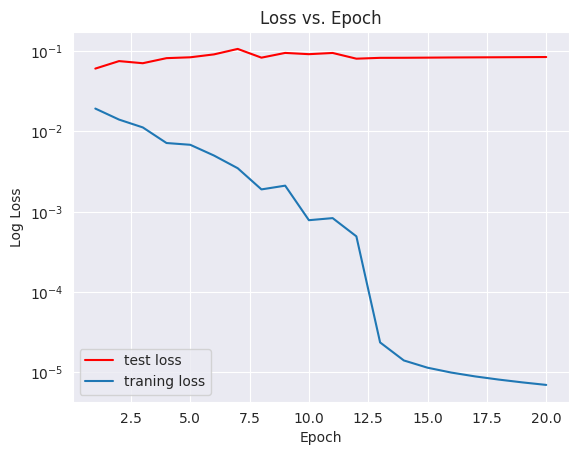

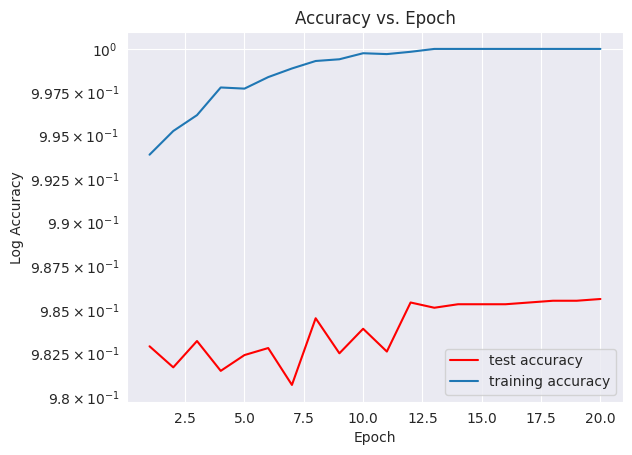

In [16]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Log Accuracy')
    plt.title('Accuracy vs. Epoch')
    plt.legend(loc='lower right')
    plt.show()

plot_loss(history_nn)
plot_accuracy(history_nn)

> Examine the trajectory of the training and test loss and accuracy. What does the erratic and divergent trajectories of the loss and accuracy tell you about the learning and generalization of the model?       
> **End of exercise.**    

> **Answer:**  
It appears at the lower epoch count, there's some erratic jumps in test accuracy, but generally lower than the higher epoch range. This irregularity in the test accuracy appears like the model is learning the test data set and we can see that the initial model wasn't generalized well since we're getting erratic response at earlier epochs. As the epochs increase, the model is just learning the test dataset better, not necessairly becoming a better model, just biased better for the test set.    

## 6.0 Adding Regularization        

You have seen some of the effects of over-fitting of the neural network model. **Regularization** methods are widely used in machine learning to prevent over-fitting. Conceptually, you can think of regularization as moving the model toward lower variance and higher bias to improve generalization. There are several widely used regularizaiton methods for deep learning models. These methods are generally used in combinations.     
- **L1 and L2 regularization** which we examined in some detail in the previous lesson.
- **Weight decay** exponentially decays the learned weights toward 0. This process constrains the learning and prevents over-fitting. Any unusually large weights will decay back toward zero and therefore more reasonable values.          
- **Batch Normalization** adjusts the output of a layer to ensure it is zero mean and unit variance. This process ensures that the results of the activations of a layer are not excessive that therefore result in over-fitting.         
- **Dropout regularization** randomly drops connections (weights) between layers as the learning proceeds. The resulting model is then an ensemble of the weights learned from each of the randomly created models. This ensemble improves regularization and generalization of the model.   

With so many options a search of possible regularization methods and hyperparamters is required. This search requires running a particular neural network architecture multiple times as hyperparameter combinations are tested. There are a number of approaches one can take to this search.      
- **Grid search** wherein a regular grid of hyperparameter choices are tried. Grid search has the advantage of being comprehensive, but at a high computational cost.     
- **Random sampling** wherein a grid of possible hyperparameter choices is randomly sampled and tested. This method can be significantly faster than a grid search, and is often nearly as effective.     
- **Huristic search** is often performed manually, selecting hyperparamter combinations based on the results of previous combinations. We will employ huristic search in these exercises because of the simplicity.    

In the case used for the following exercise, the following hyperparameter combinations where tried. Keep in mind, the exact validation metrics achieved will vary from one run to the next as a result of random sampling effects.

| Validatiion Accuracy | L2 regularization | Learning rate | Weight decay | Batch normalization |   
| -------------------- | ----------------- | ------------- | ------------ | ---------------------- |
| .8979                | 0.05              |  0.00005      | 0.0001       |  None                  |
| .8754               | 0.5              |  0.000005      | None      |  None                  |
| .8763                | 0.05              |  0.000005      | 0.0001       |  None                  |
| Erratic learning      | 0.005              |  0.0005      | 0.0001       |  None                  |
| .9462               | 0.005              |  0.0005      | 0.01       |  None                  |

Notice that the hypterparameters control several aspects of the model training.     
1. The L2 affects the weights learned for the [Dense](https://keras.io/api/layers/core_layers/dense/) layer. Notice that regularizers can be applied to other weights, such as the bias. We will ignore these alternatives for now.     
2. The momentum hypterparameter is the primary control for the behavior of the [BatchNormalization](https://keras.io/api/layers/normalization_layers/batch_normalization/) layer.      
3. The [RMSprop](https://keras.io/api/optimizers/rmsprop/) optimizer has quite a number of hypterparameters. The learning rate and weight decay are the most important in general. Selecting an optimal value of momentum can be helpful in some cases. Other hypterparameters are helpful for cases where the optimizer fails to converge. It should be noted that it is not unusual for a particular choice of optimizer to not work well for a specific problem and neural network. Another optimizer can then be tried. Keras, like most deep learning frameworks, has a [long list of optimizers](https://keras.io/api/optimizers/) you can choose from.   

> **Important note:** In the following examples we limit the search for optimal hyperparamters in several ways.
> 1. We will only search a limited number of architectural alternatives. In this case, we will test models with and without batch normalization, a form of regularization. For a real-world problem, a more extensive search for optimal model architecure is often required. For example, we could try greater model depth, in the form of more fully connected layers, or we could experiment with adding dropout regularization layers.      
> 2. We will only search a limited hyperparameter space. A full search would take considerable computing time, but could be worth the improvement if we were optimizing a model for real-world use.    
> 3. We are limiting training time to just 80 epochs. For complex models it is typical to train for hundreds or even thousands of epochs.

> **Exercise 5-7:** You will now add L2 combined with weight decay regularization to the hidden layers of your model. Keras uses the [layer weight regularizer class](https://keras.io/api/layers/regularizers/) to add L1 and L2 weight constraints to the to layers. Here, we will only used the L2 regularizer. At the same time we must change the learing rate. Do the following:    
> 1. Starting with the model specification you have been using for exercise 5-6, add the following argument to the input and hidden layer specificaition; `kernel_regularizer=regularizers.l2(0.005)` argument.    
> 2. Compile the model with the 'optimizer=RMSprop(learning_rate=0.0005, decay=0.01)' argument. This code sets a learning rate and a weight decay parameter.  
> 3. Fit the model for 80 epochs, saving the history object. This will take some time!   
> 4. Plot the training and test loss and accuracy.

> **Note on compatibility.**  Depending on the version of TensorFlow you are using the `decay` argument may acually be `weight_decay`. If you find an error of an unknown argument try changing to the other possibility.  

Epoch 1/80
1875/1875 [==============================] - 14s 7ms/step - loss: 1.9434e-05 - accuracy: 1.0000 - val_loss: 0.0944 - val_accuracy: 0.9861
Epoch 2/80
1875/1875 [==============================] - 15s 8ms/step - loss: 3.6993e-06 - accuracy: 1.0000 - val_loss: 0.0969 - val_accuracy: 0.9857
Epoch 3/80
1875/1875 [==============================] - 15s 8ms/step - loss: 3.0019e-06 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9857
Epoch 4/80
1875/1875 [==============================] - 15s 8ms/step - loss: 2.5543e-06 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9862
Epoch 5/80
1875/1875 [==============================] - 13s 7ms/step - loss: 2.2974e-06 - accuracy: 1.0000 - val_loss: 0.0983 - val_accuracy: 0.9860
Epoch 6/80
1875/1875 [==============================] - 13s 7ms/step - loss: 2.2792e-06 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9858
Epoch 7/80
1875/1875 [==============================] - 14s 8ms/step - loss: 2.0872e-06 - accuracy: 1.0000

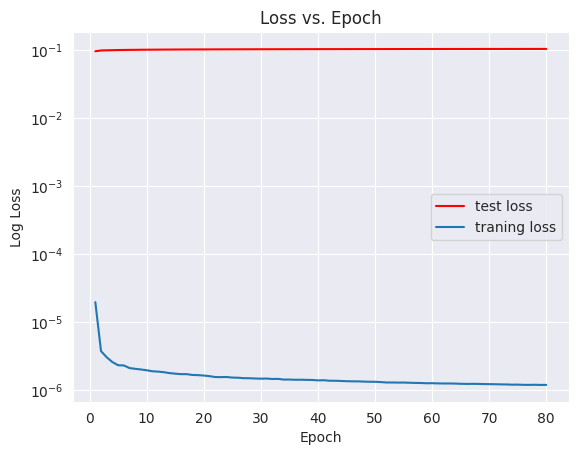

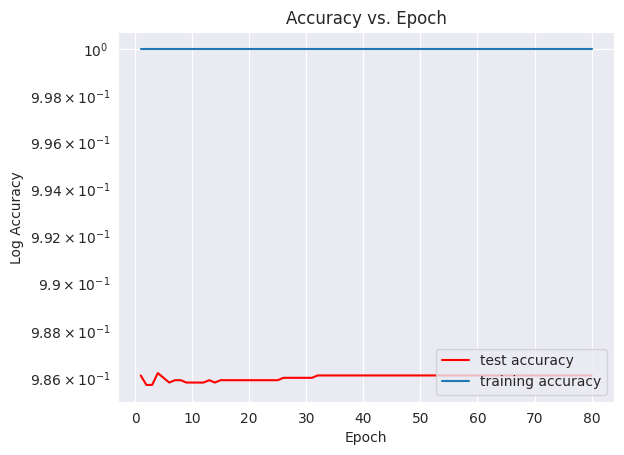

In [18]:
## Your code goes here
# Starting with the model specification you have been using for exercise 5-6, add the following argument to the input and hidden layer specificaition; kernel_regularizer=regularizers.l2(0.005) argument.
input_layer = nn.layers[0]
input_layer.kernel_regularizer = regularizers.l2(0.005)

hidden_layer = nn.layers[1]
hidden_layer.kernel_regularizer = regularizers.l2(0.005)

# Compile the model with the 'optimizer=RMSprop(learning_rate=0.0005, decay=0.01)' argument. This code sets a learning rate and a weight decay parameter.
nn.compile(optimizer=RMSprop(learning_rate=0.0005, decay=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model for 80 epochs, saving the history object. This will take some time!
results = nn.fit(train_images, train_labels, epochs=80, validation_data=(test_images, test_labels))
# Plot the training and test loss and accuracy.
plot_loss(results)
plot_accuracy(results)



> Compare the charts of loss and accuracy for the regularized model with those from training the unregularized model. The shape of the training and validation metric curves is greatly improved. Now, answer these questions:    
> 1. Do the charts and numeric metrics for the regularized model show an improvement in the generalization of the model compared to the unregularized model, and why?      
> 2. Notice that the test and training loss of the regularized model continue to improve. Do you think that training for additional epochs will be beneficial?       
> 3. Do the validation metrics show any sign of randomness and what does this tell you about the model architecture and the choice of hyperparameters?   
> **End of exercise.**      

> **Answers:**    
> 1.  There is an improvement in generalization, but it does appear to be slight. I believe, especially in the earlier epochs, the weighted decay removed some of the erratic randomness of the weights.  
> 2.  I think the accuracy would continue to improve, but I think we've already hit a point of diminishing returns. The compute cost for fractional increase probably doesn't work out anymore.  
> 3.  There's some slight randomness at the earlier epochs, but far less than before and really none after about the 15th epoch. It seems this architecture makes smaller, more controlled changes to the weights, resulting in a more controlled ramp up.

As a next step to improve the model we will add a batch normalization layer following the fully connected hidden layer. As a result of this change in architecture, we must perform another hyperparameter search. In this case, another huristic search is performed with a fixed momentum hyperparameter for the batch normalization.The results of the search are shown in the table.        

| Validatiion Accuracy | L2 regularization | Learning rate | Weight decay | Batch normalization |   
| -------------------- | ----------------- | ------------- | ------------ | ---------------------- |
| .9752            | 0.2             |  0.00005      | None     |  Momentum=0.998                 |
|Erratic learning  | 0.2             |  0.0005      | 0.001       |  Momentum=0.998                 |
|Slow learning    | 0.02             |  0.00005      | 0.01       |  Momentum=0.998                 |
|Slow learning    | 0.02             |  0.00005      | 0.01       |  Momentum=0.998                 |
|.9789             | 0.2             |  0.0005      | 0.01       |  Momentum=0.998                 |

> **Exercise 5-8:** The path of the test loss and particularly the test accuracy of the foregoing model is rather erratic. Such behavior often indicates that the gradient is diffcult to estimate and therefore the optimizer exhibits poor convergence. Batch normalizaiton is known to smooth the loss function which improves the ability to consistently estimate gradient. You will now add a **[BatchNormalization layer](https://keras.io/api/layers/normalization_layers/batch_normalization/)** to the model, along with L2 regularization. Do the following:    
> 1. Start with the model specification you used for Exercise 5-7, change the model name to `nnbr`.
> 2. For the dense hidden layer set the L2 regularization hypterparameter to 0.2.  
> 3. After the 512 unit hidden dense layer add a [BatchNormalization](https://keras.io/api/layers/normalization_layers/batch_normalization/) layer, using the argument `momentum=0.998`.
> 4. Compile the model with the optimizer=RMSprop(learning_rate=0.0005, decay=0.01), argument.   
> 5. Fit the model for 80 epochs, saving the history object. This will take some time!   
> 6. Plot the training and test loss and accuracy.  

In [ ]:
## Your code goes here
# Start with the model specification you used for Exercise 5-7, change the model name to nnbr.
nnbr = nn
# For the dense hidden layer set the L2 regularization hypterparameter to 0.2.
in_layer, hidden_layer, output_layer = nnbr.layers
hidden_layer.kernel_regularizer = tf.keras.regularizers.l2(0.2)
# After the 512 unit hidden dense layer add a BatchNormalization layer, using the argument momentum=0.998.
new_layer = tf.keras.layers.BatchNormalization(momentum=0.998)
nnbr = tf.keras.Sequential([in_layer, hidden_layer, new_layer, output_layer])
# Compile the model with the optimizer=RMSprop(learning_rate=0.0005, decay=0.01), argument.
nnbr.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005, weight_decay=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model for 80 epochs, saving the history object. This will take some time!
history_nnbr = nnbr.fit(train_images, train_labels, epochs=80, validation_data=(test_images, test_labels))
# Plot the training and test loss and accuracy.
plot_loss(nnbr)
plot_accuracy(nnbr)





Epoch 1/80
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.2012 - val_accuracy: 0.9707
Epoch 2/80
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.1430 - val_accuracy: 0.9790
Epoch 3/80
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.1351 - val_accuracy: 0.9779
Epoch 4/80
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.1394 - val_accuracy: 0.9769
Epoch 5/80
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.2712 - val_accuracy: 0.9566
Epoch 6/80
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.1323 - val_accuracy: 0.9791
Epoch 7/80
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.1645 - v

> Compare the graphs to the train and test loss and train and test accuracy to the foregoing model without the batch normalization and answer these questions:  
> 1. What does the difference in smoothness, especially for the test accruacy, tell you about the change in behavior of the gradient?     
> 2. Notice the overall shape of the learning metric curves. What might the abrupt change in slope of the validation accuracy curve tell you about the learning rate?        
> **End of exercise.**   

> **Answers:**
> 1.      
> 2.     

## 7.0 Learning Rate Decay  

The foregoing model training appears to have worked rather well. But, can we do better? One possibility is to use a **adaptive learning rate** or **decaying learning rate**. Keras, like most deep learning frameworks, provides [utilities to define decaying learning rate schedules](https://keras.io/api/optimizers/learning_rate_schedules/). Here we will work with an exponential learning rate. You can see specific examples of using this utility [here](https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/).

| Validatiion Accuracy | L2 regularization | Learning rate | Weight decay | Batch normalization |   
| -------------------- | ----------------- | ------------- | ------------ | ---------------------- |
| .9810               | 0.2              |  initial rate=5e-5      | None      |  Momentum=0.998       |
| Erratic results     | 0.2              |  initial rate=5e-4      | None      |  Momentum=0.998       |
| Very slow learning  | 0.2              |  initial rate=5e-6      | None      |  Momentum=0.998       |
| .9225              | 0.02              |  initial rate=5e-5      | 0.01      |  Momentum=0.998       |
| .9258              | 0.002              |  initial rate=5e-5      | 0.01      |  Momentum=0.998       |
| .9640            | 0.002              |  initial rate=5e-5      | 0.001      |  Momentum=0.998       |
| .9644           | 0.0002              |  initial rate=5e-5      | 0.001      |  Momentum=0.998       |
| .9779           | 0.0002              |  initial rate=5e-5      | 0.0001      |  Momentum=0.998       |

> **Exercise 5-9:**  You will now implement and test a model with an exponentially decreasing learning rate:    
> 1. Start with the model specification you used for Exercise 5-8, change the model name to `nnvr`.
> 2. For the dense hidden layer set the L2 regularization hypterparameter to 0.2.  
> 3. Create a learning rate schedule using the [Keras exponential learning rate scheduler] (https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/) with 'initial_learning_rate=5e-5', 'decay_steps=1000', 'decay_rate=0.9'.
> 4. Compile the model with the optimizer=RMSprop(learning_rate=your_lerarning_rate_schedule), argument.   
> 5. Fit the model for 80 epochs, saving the history object. This will take some time as before.   
> 6. Plot the training and test loss and accuracy.  

In [ ]:
## Your code goes here







> Examine the results and answer these questions:       
> 1. Compare the validation accuracy curve and final accuracy to the same curve and final accuracy value for the model trained with fixed learning rate. What do the differences in the curve and final learning rate tell you about the effect of using a variable learning rate?      
> 2. Examine the shape of the training and validation curves. What does this shape tell you about the learning of this model?        
> **End of exercise.**   

> **Answers:**       
> 1.    
> 2.    

## 8.0 Dropout Regularization   

Dropout regularization randomly drops (set to zero weight) connections in the neural network. The fraction of weights dropped is a hyperparameter which must be set. A good typical starting values is around 0.5. Emerical evidence indicates that results are not particularly sensitive to this value.      

Here, the batch normalization layer has been replaced by a dropout regularization layer. This seemingly small change actually has a large effect on the model architecture. As a result, an extensive hyperparameter search was required to achieve good model performance. The hyperparameter choices tried are summarized in the table below.        

You many wonder why the final model selected has lower accuacy than some other hyperparameter choices. These seemingly superior choices resulted in very odd convergence behavior of the model. In these cases the training metrics continued to improve considerably, whereas the validation metrics where stuck at a significantly different level. This outcome indicated that the model was in overfit or the training was stuck at some local optimum. To correct this problem, additional mild regularizaton was added. The regularization added bias to the model training, reducing the accuacy metric slightly, but corrected the problem of serious over-fitting.    

> **Important note:** For the simplicity of our examples, we have substituted the dropout regularization layer for the batch normalization layer. You should not conclude from this example that one cannot or should not use both types of regularizers. In fact, in many deep architectures using both dropout regularization and batch normalization together is common practice.  

| Validatiion Accuracy | L2 regularization | Learning rate | Weight decay | Dropout rate |   
| -------------------- | ----------------- | ------------- | ------------ | ---------------------- |
| Very slow learning    | 0.2              |  initial rate=5e-5      | None      |  0.5       |
|  Very slow learning     | 0.02              |  initial rate=5e-5      | None      |  0.5       |
|  Very slow learning  | None             |  initial rate=5e-5      | 0.01      |  0.5       |
| .9525   | None             |  initial rate=5e-5      | 0.0001   |  0.5       |
| .9620  | None             |  initial rate=5e-5      | none   |  0.5       |
| .9666  | None             |  initial rate=5e-5      | none   |  0.3       |
| .9835, divergence between train and validation | None             |  initial rate=5e-4      | none   |  0.3       |
| .9832, divergence between train and validation | None             |  initial rate=5e-4      | none   |  0.5       |
| .9838, divergence between train and validation | None             |  initial rate=5e-4      | none   |  0.1       |
| .9822, less divergence | 0.0002             |  inittheial rate=5e-4      | 0.0001  |  0.1       |
| .9814 | 0.0002             |  initial rate=5e-4      | 0.0001   |  0.1       |


> **Exercise 5-10:**  You will now create and evaluate a model using a dropout regularization layer:   
> 1. Start with the model specification you used for Exercise 5-9, change the model name to `nndo`.
> 2. For the dense hidden layer set the L2 regularization hypterparameter to 0.0002.  
> 3. Replace the batch normalization layer with a [Dropout regularization layer](https://keras.io/api/layers/regularization_layers/dropout/) with `rate=0.5`.
> 4. Create a learning rate schedule using the [Keras exponential learning rate scheduler] (https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/) with 'initial_learning_rate=5e-4', 'decay_steps=1000', 'decay_rate=0.9'.
> 4. Compile the model with the optimizer=RMSprop(learning_rate=lr_schedule, decay=0.0001), argument.   
> 5. Fit the model for 80 epochs, saving the history object. This will take some time as before.   
> 6. Plot the training and test loss and accuracy.  

In [ ]:
## Your code goes here







> Examine the accuracy value achived and the curves for the training and validation metrics and answer these questions.      
> 1. How do the final trajectory of the validation accuracy curve and validation accuracy compare to the perviously fit model using batch normalizatuion?                    
> 2. Examine the change in slope in this curve, comparing it to the perviously fit model using batch normalizatuion. What might the difference in the shapes tell you about the learning of this new model?        

> **Answers:**      
> 1.       
> 2.    

##### Copyright 2018, 2019, 2020, 2021, 2022, 2023, 2024, Stephen F Elston. All rights reserved